
Bank Churn prediction

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary:

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

## Importing necessary libraries

In [ ]:
#importing tensorflow
import tensorflow as tf
print(tf.__version__)

2.15.0


In [ ]:
!pip install scikeras

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc,roc_curve
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

import keras
import tensorflow as tf
from keras import callbacks
from scikeras.wrappers import KerasClassifier

from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Recall
from sklearn.model_selection import GridSearchCV

# To oversample and undersample data
from imblearn.over_sampling import SMOTE

import warnings

warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Loading the dataset

In [ ]:
ds = pd.read_csv("/content/drive/MyDrive/Austin Texas/Neural Network/Project/Churn.csv")
ds.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Data Overview

#### The shape of the dataset

In [ ]:
ds.shape

(10000, 14)

The dataset has **10000** rows and **14** columns

####View the first and last 10 rows of the dataset.

In [ ]:
ds.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [ ]:
ds.tail(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9990,9991,15798964,Nkemakonam,714,Germany,Male,33,3,35016.60,1,1,0,53667.08,0
9991,9992,15769959,Ajuluchukwu,597,France,Female,53,4,88381.21,1,1,0,69384.71,1
9992,9993,15657105,Chukwualuka,726,Spain,Male,36,2,0.00,1,1,0,195192.40,0
9993,9994,15569266,Rahman,644,France,Male,28,7,155060.41,1,1,0,29179.52,0
9994,9995,15719294,Wood,800,France,Female,29,2,0.00,2,0,0,167773.55,0
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


####Check the data types of the columns for the dataset.

In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


The dataset has 14 columns.<br>
Data types:
- Integer: 9 columns.
- Float (decimal): 2 column (Balance and EstimatedSalary).
- Object: 3 columns (Surname,Geography and Gender).


- **There are no missing values.**

#### Checking the number of unique values

In [ ]:
ds.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

#### Checking missing values

In [ ]:
ds.isnull().sum()


RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

There is no missing values.

####Checking the statistical summary of the data

In [ ]:
ds.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


- **RowNumber** is a ID key for each row. Should be removed during the data preparation.
- **CustomerID** is a ID for each customer. Should be removed during the data preparation.
- **Exited** is the target. Based on the summary the churn is small (~ 20%).
-  **CreditScore**: Min:350, average:~650,Max:850
- **Age**: Min:18 years, average:~38 years,max:92 (very old customer), this field should have outliers since the standard deviation is 10 years and Q3 is ~44 years).
- **Tenure**: min: 0, average: ~5 years, Max:10 years.
- **Balance**: min:0,Average: 7.6K dolars, Max: 251K.
- **Estimated Salary**: min: 12 (!), Average:10k,max: 199K
- **NunOfProducts**: min:1 product, average:~1.5 product, max:4 products.
- **HasCrCard**: It is a categorical variable. ~70% have credit card.
- **IsActiveMember**:It is a categorical variable. ~51% are active.     

## Exploratory Data Analysis

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of the credit score of customers? Are there any noticeable patterns or outliers in the distribution?
2. How many active members are there with the bank?
3. How are the different customer attributes correlated to each other?
4. Who is churning more when compared to males and females?  
5. Customers from which geographical part are churning more?

#### Creating the supporting functions

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

#### Univariate

- Credit Score

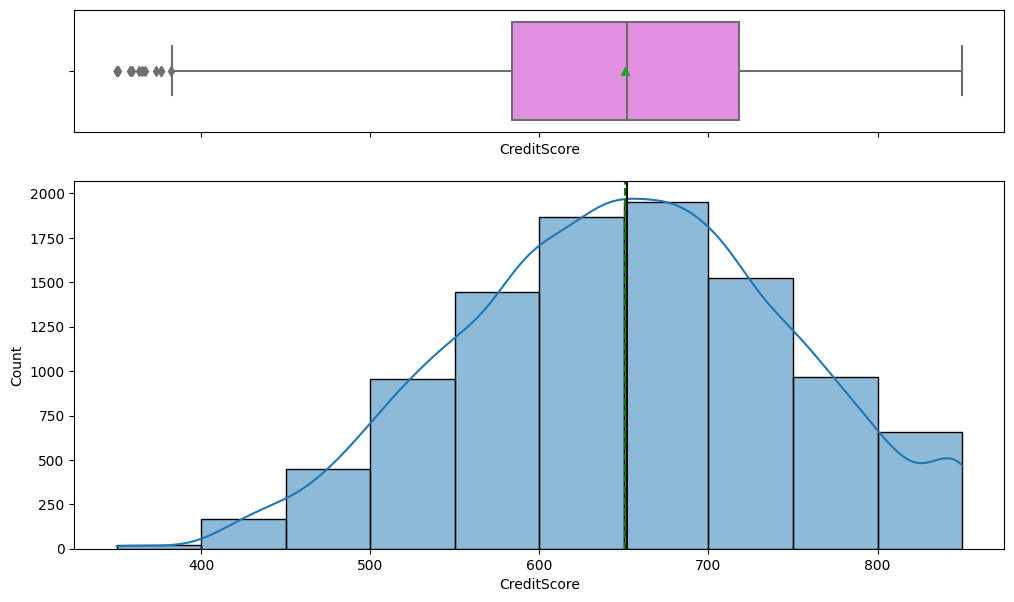

In [ ]:
histogram_boxplot(ds, "CreditScore", kde=True, bins=10)

Observations:
- Credit score is very close to a normal distribution (mean: ~650).
- There are outliers with small credit score (less than 400)

- Age

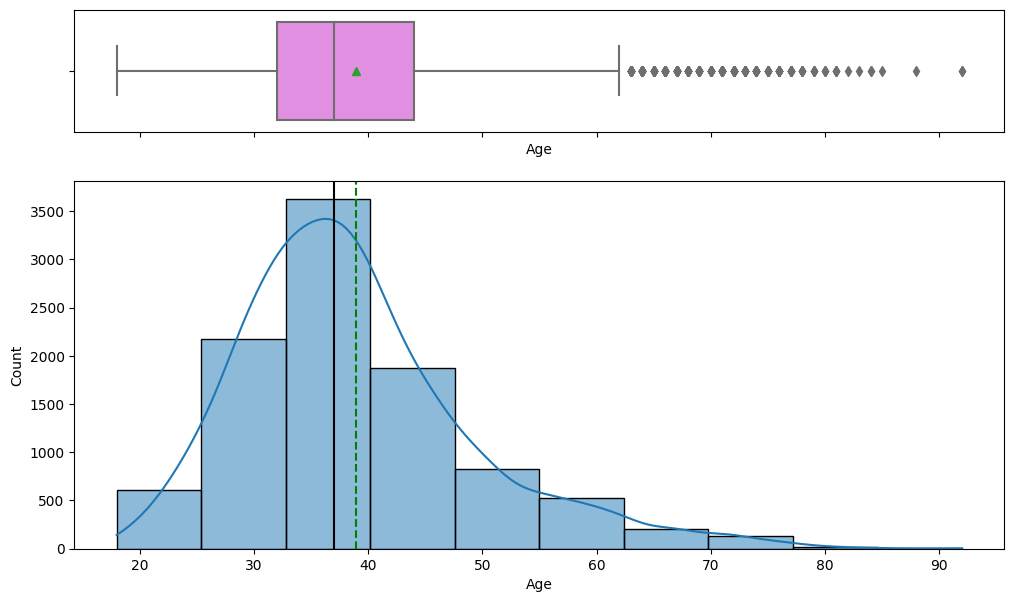

In [ ]:
histogram_boxplot(ds, "Age", kde=True, bins=10)

Observations:
 - There are outliers . Customers with more than ~62 years

- Tenure

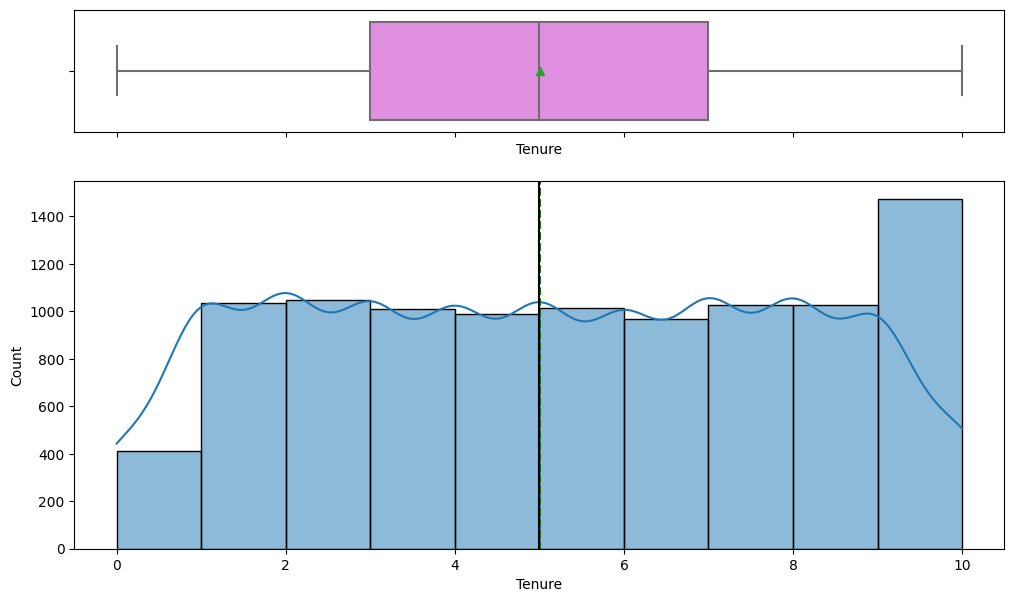

In [ ]:
histogram_boxplot(ds, "Tenure", kde=True, bins=10)

Observations:
- Tenure has a uniform distribution.

- Balance

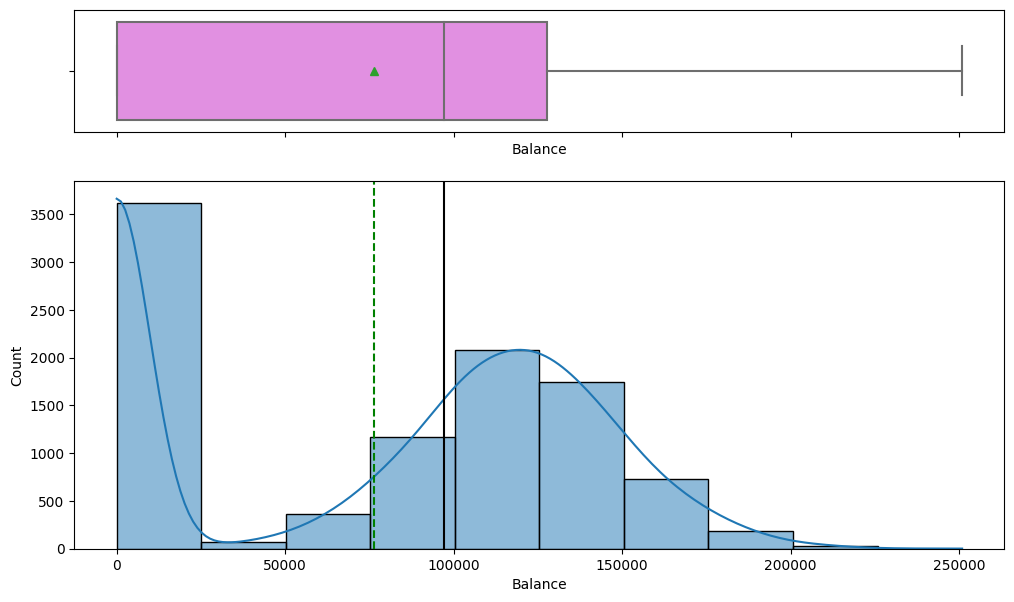

In [ ]:
#Balance
histogram_boxplot(ds, "Balance", kde=True, bins=10)

- Estimated Salary

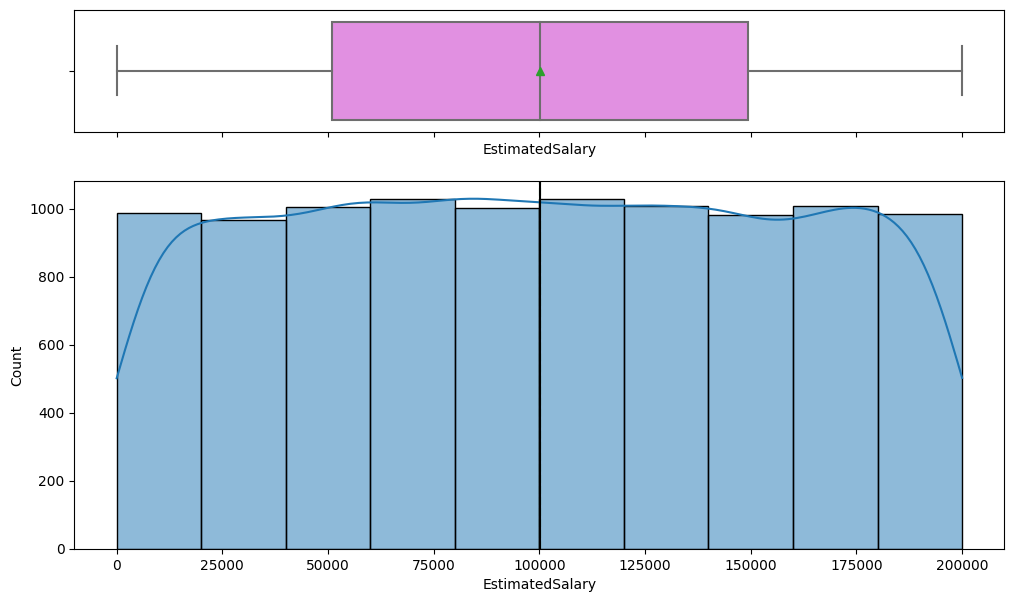

In [ ]:
#EstimatedSalary
histogram_boxplot(ds, "EstimatedSalary", kde=True, bins=10)

- Geography

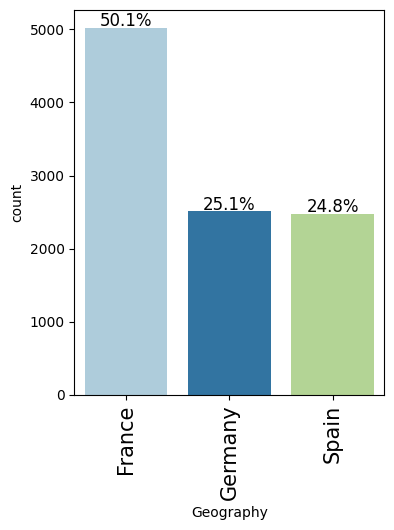

In [ ]:
labeled_barplot(ds, "Geography", perc=True)

Observations:
- ~50% of the customers are in France.

- Gender

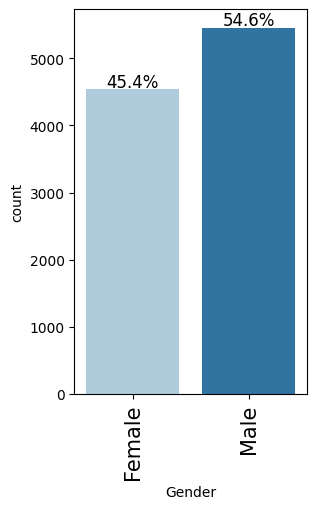

In [ ]:
labeled_barplot(ds, "Gender", perc=True)

- Has Credit Card

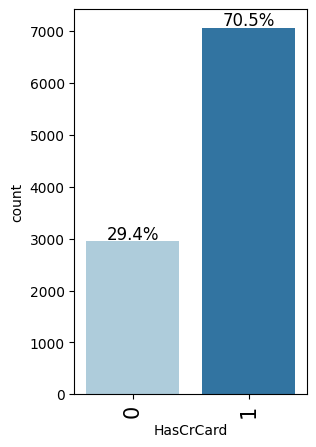

In [ ]:
labeled_barplot(ds, "HasCrCard", perc=True)

- Is Active Member

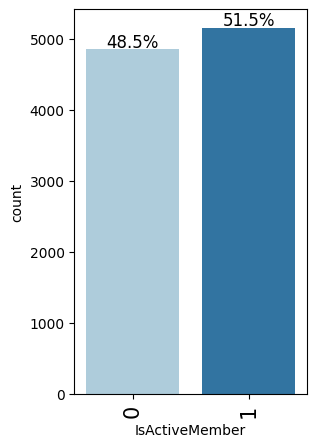

In [ ]:
labeled_barplot(ds, "IsActiveMember", perc=True)

Observations:
- **51.5%** of the customers are active members.

- Exited (target)

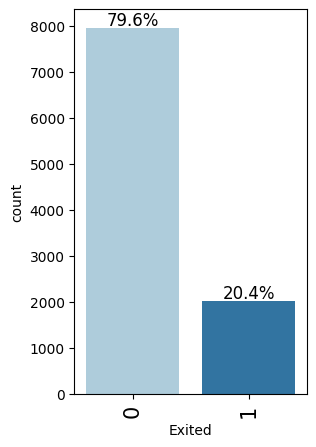

In [ ]:
labeled_barplot(ds, "Exited", perc=True)

Observations:
 - The dataset in unbalaced having only ~20% of customers exited.  

- Correlation

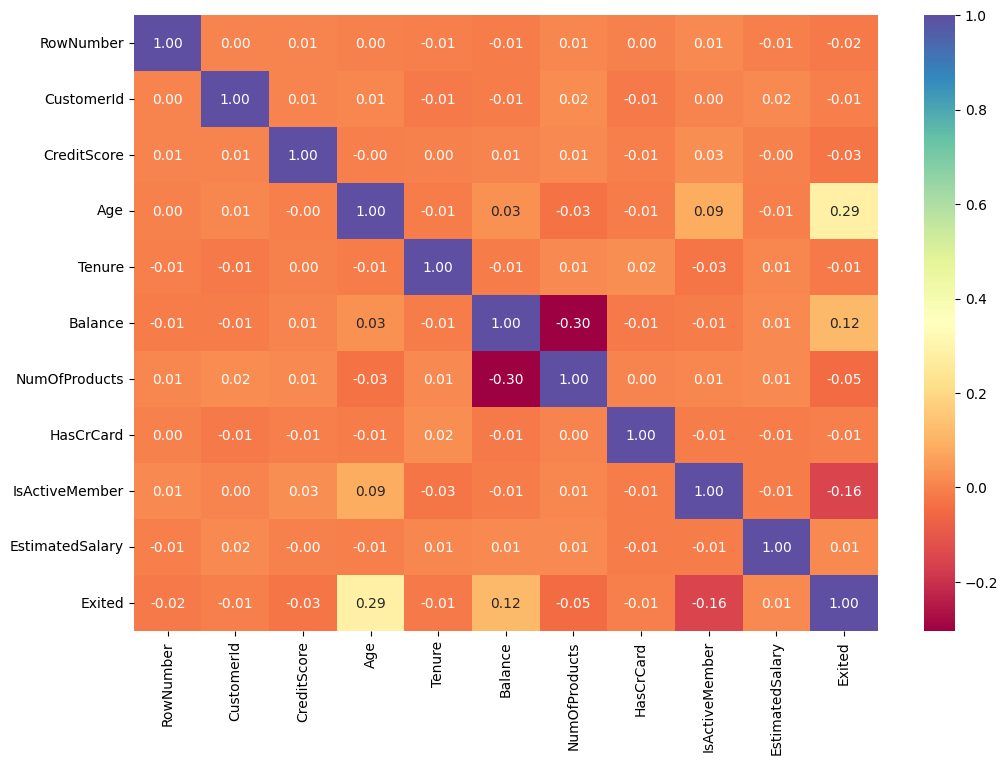

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(ds.corr(), annot=True,fmt=".2f", cmap="Spectral")
plt.show()


Observations:
- In general there are no strong correlation between the variables.
- Age and Exited have a small positive correlation.
- Number of products has a small negative correlation with Balance.
- IsActiveMember has a small negative correlation with Exited.


#### Bivariate Analysis

- **Geography x Exited**

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


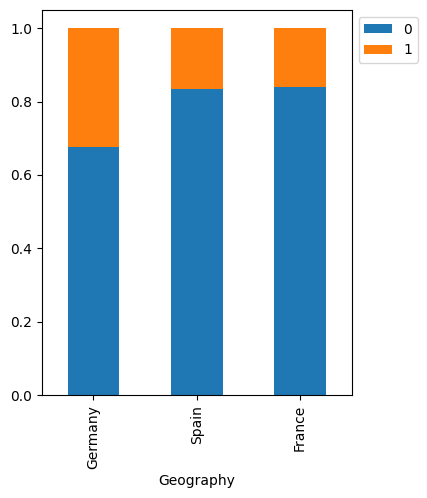

In [ ]:
stacked_barplot(ds, "Geography", "Exited" )

Observations:
- The proportion of churn in Germany (~32%) is bigger than in the other contries.

- **Gender x Exited**

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


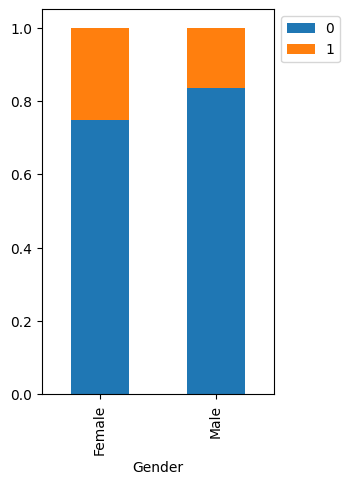

In [ ]:
stacked_barplot(ds, "Gender", "Exited" )

Observations:
- The proportion of female with churn is bigger than the male (female: 25% / Male:16%)

- **HasCreditCard x Exited**

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


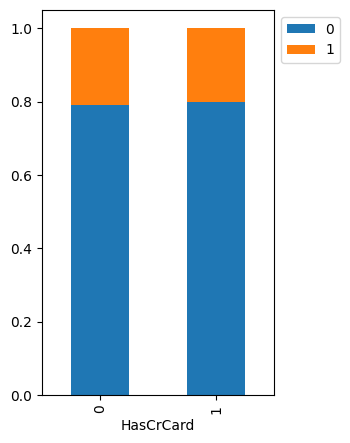

In [ ]:
stacked_barplot(ds, "HasCrCard", "Exited" )

- Is Active Member x Exited

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


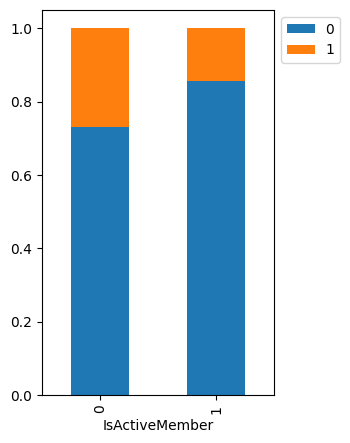

In [ ]:
stacked_barplot(ds, "IsActiveMember", "Exited" )

- **Credit Score x Exited**

Observations:
- The churn between non active (~27%) is greater than between the active customers (~14%).

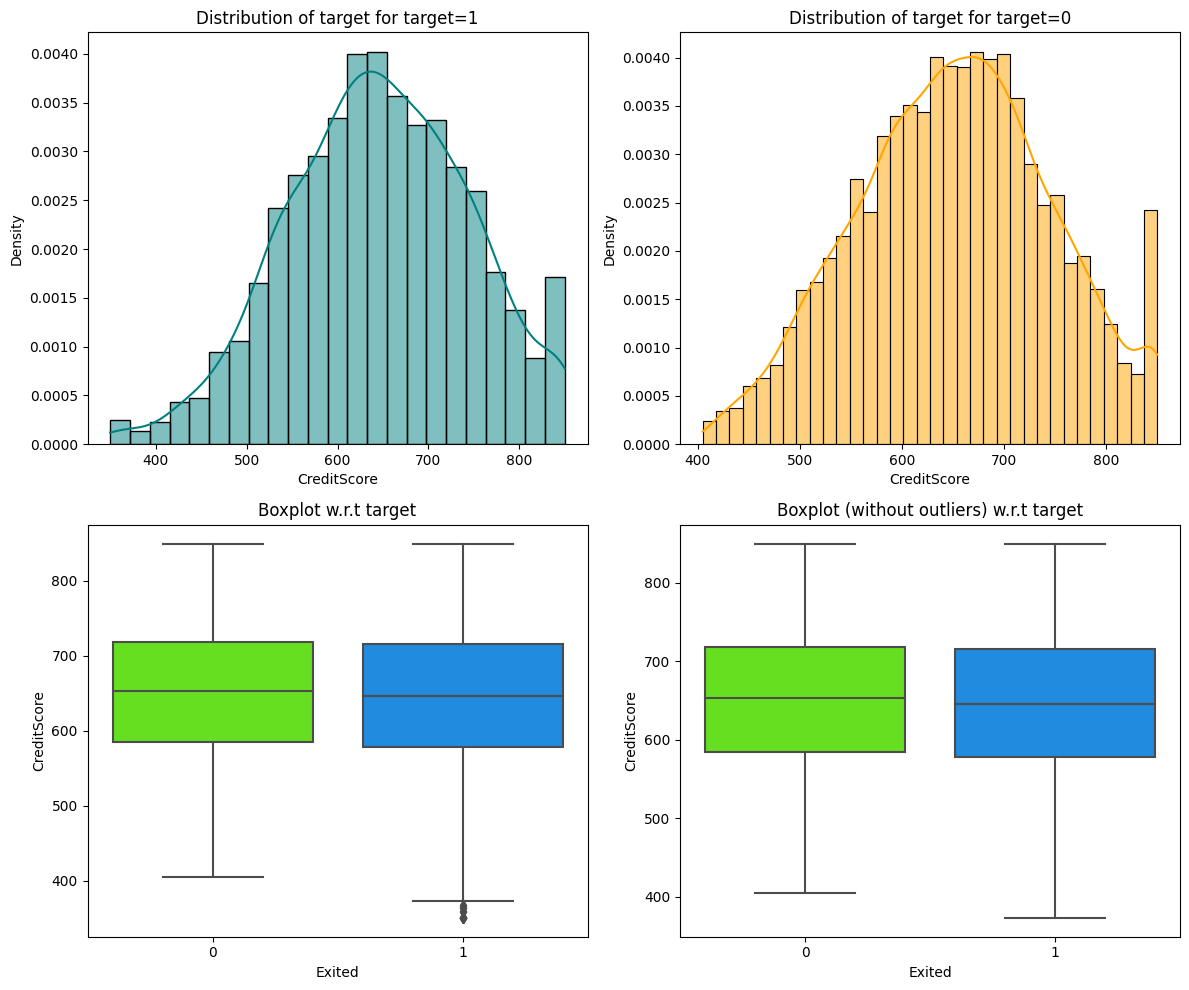

In [ ]:
distribution_plot_wrt_target(ds,"CreditScore" , "Exited")

- **Age x Exited**

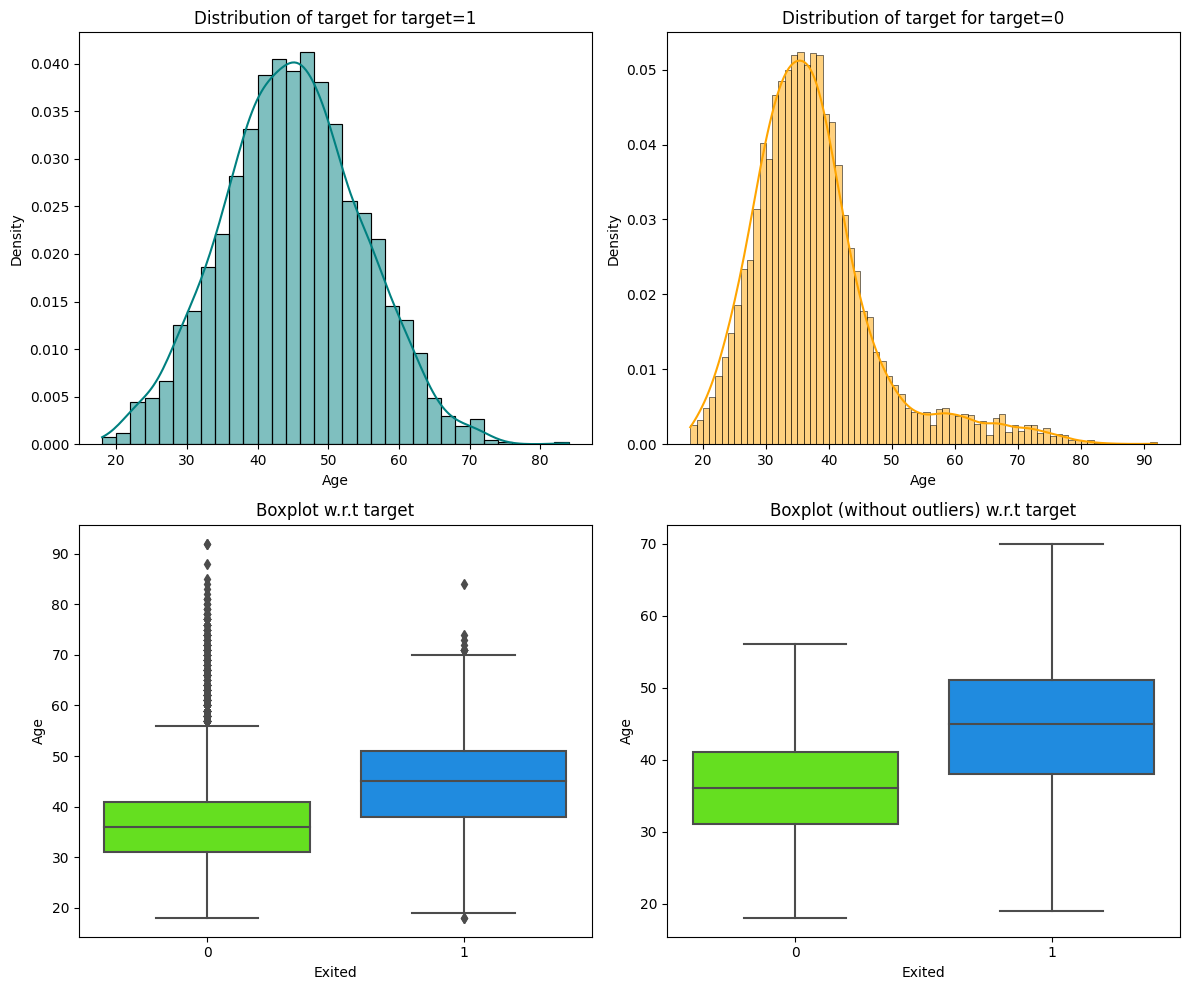

In [ ]:
distribution_plot_wrt_target(ds,"Age" , "Exited")

- **Tenure x Exited**

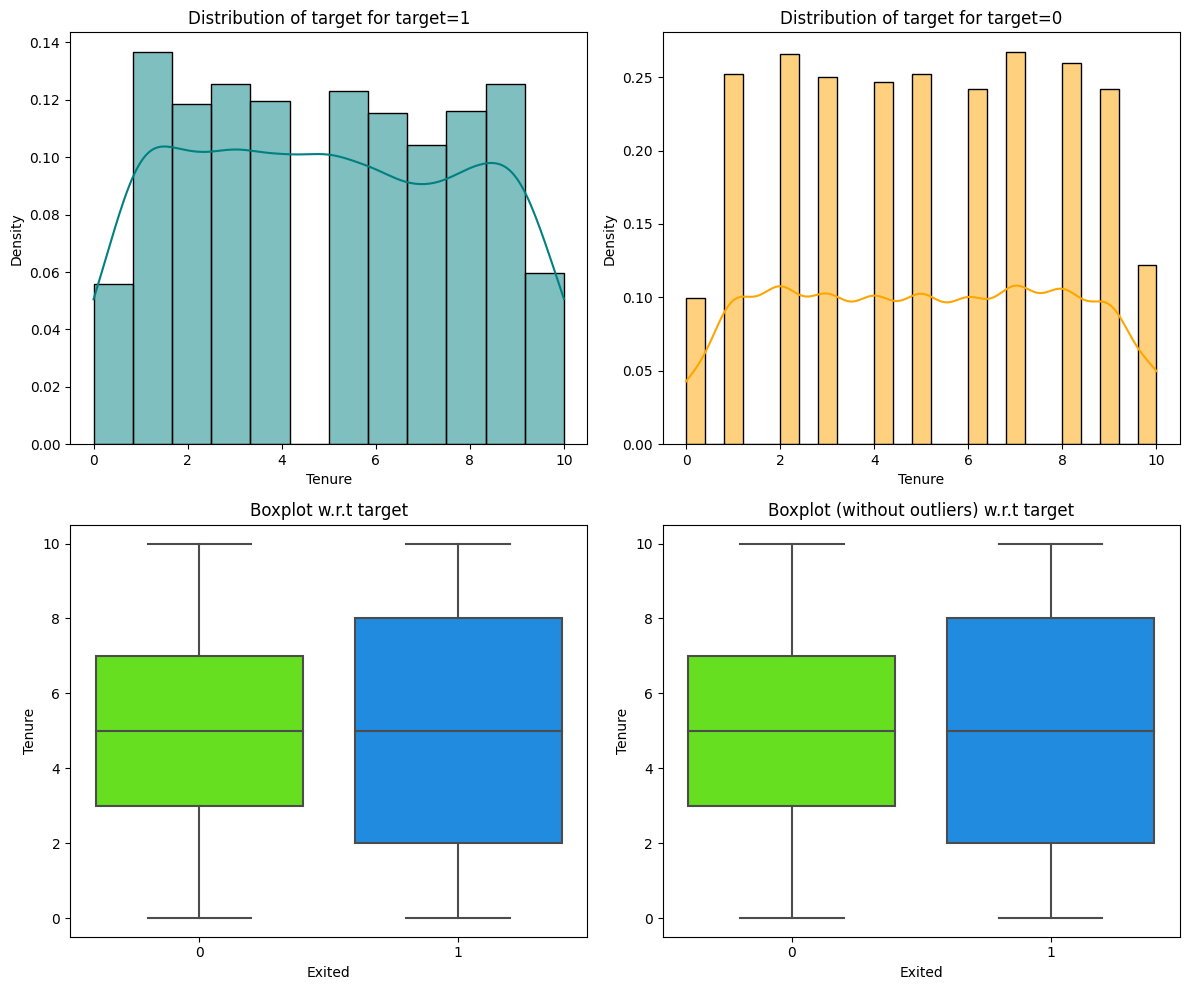

In [ ]:
distribution_plot_wrt_target(ds,"Tenure" , "Exited")

- **Balance x Exited**

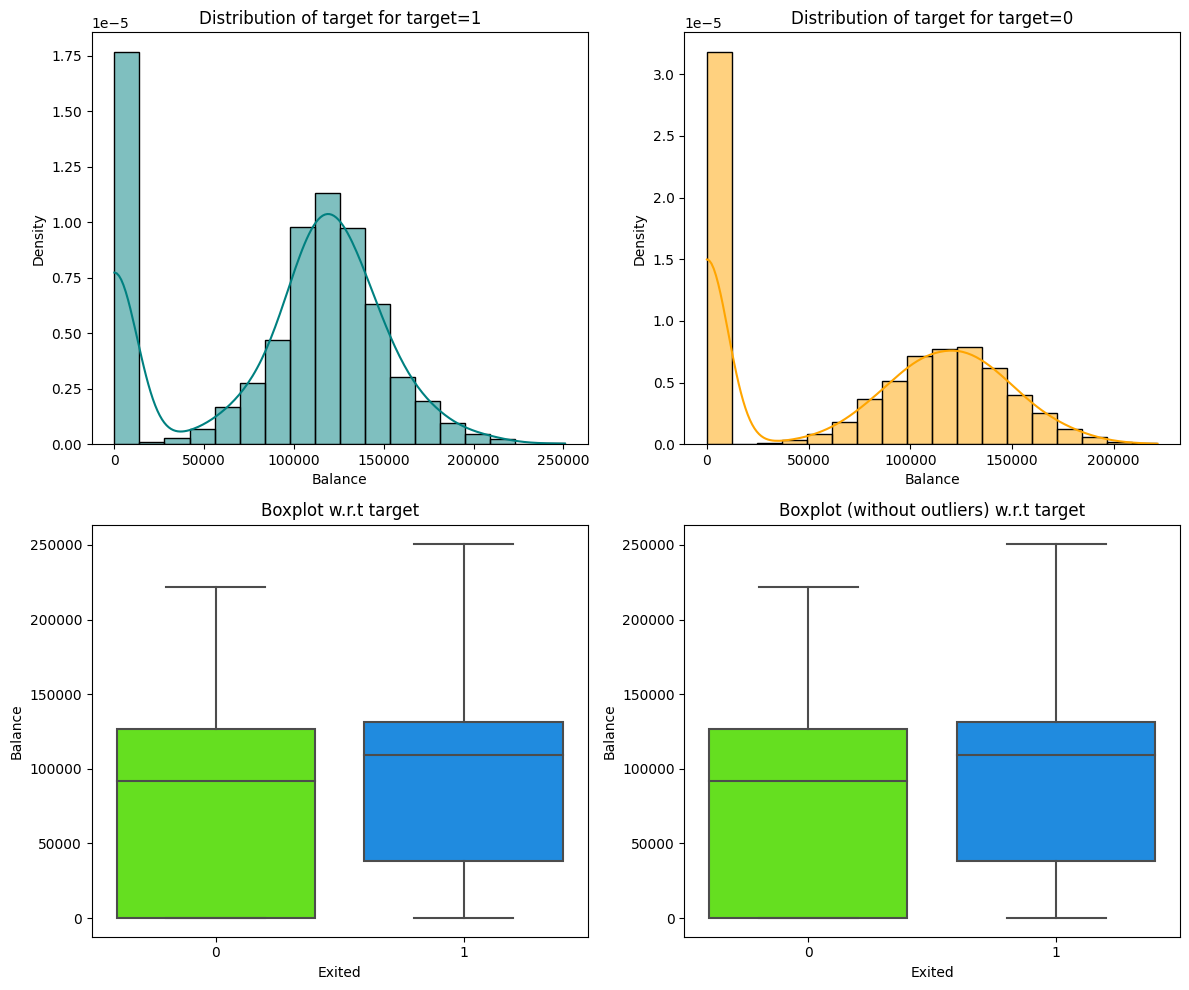

In [ ]:
distribution_plot_wrt_target(ds,"Balance" , "Exited")

**- Num Products x Exited**

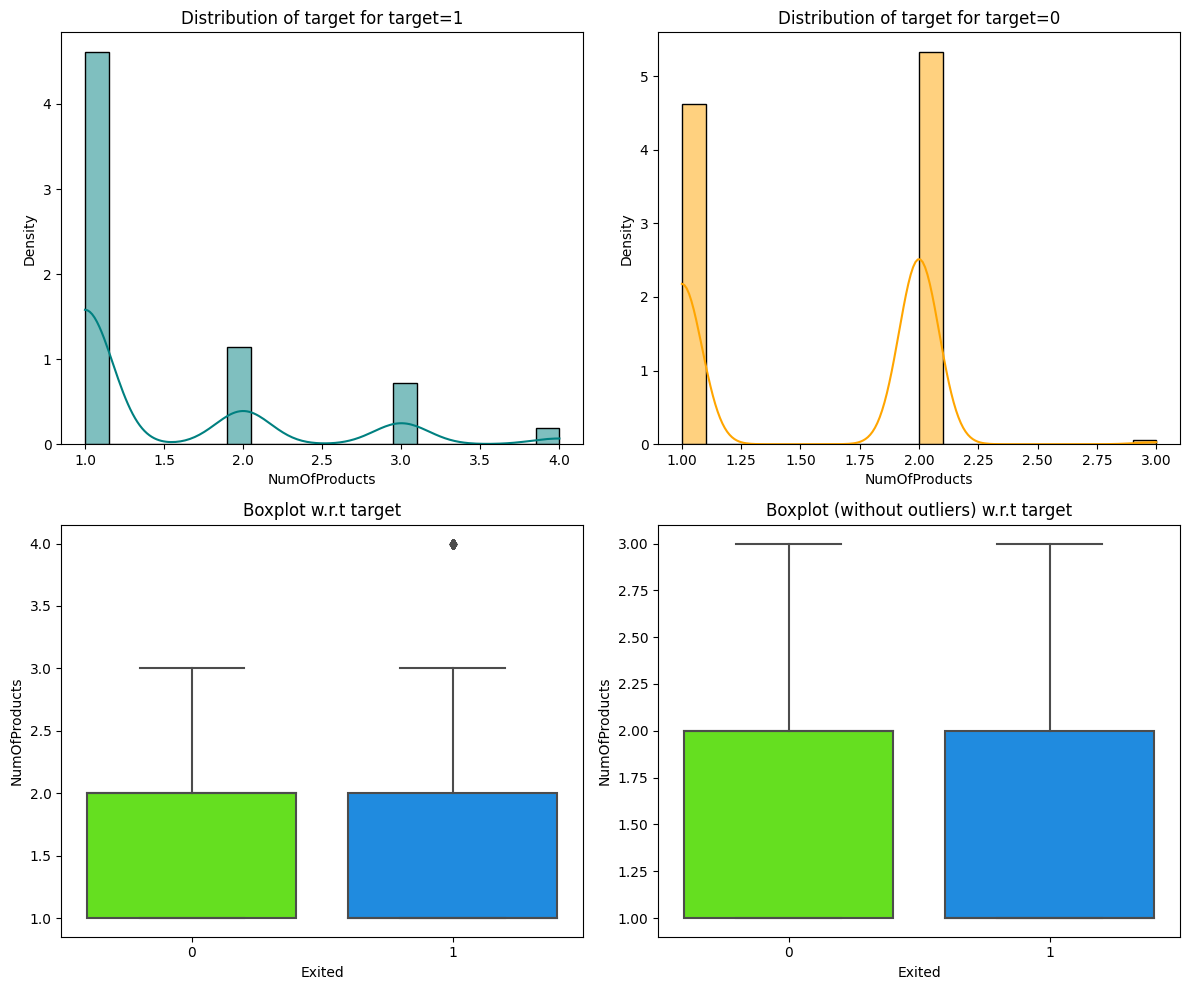

In [ ]:
distribution_plot_wrt_target(ds,"NumOfProducts" , "Exited")

- **Estimated Salary x Exited**

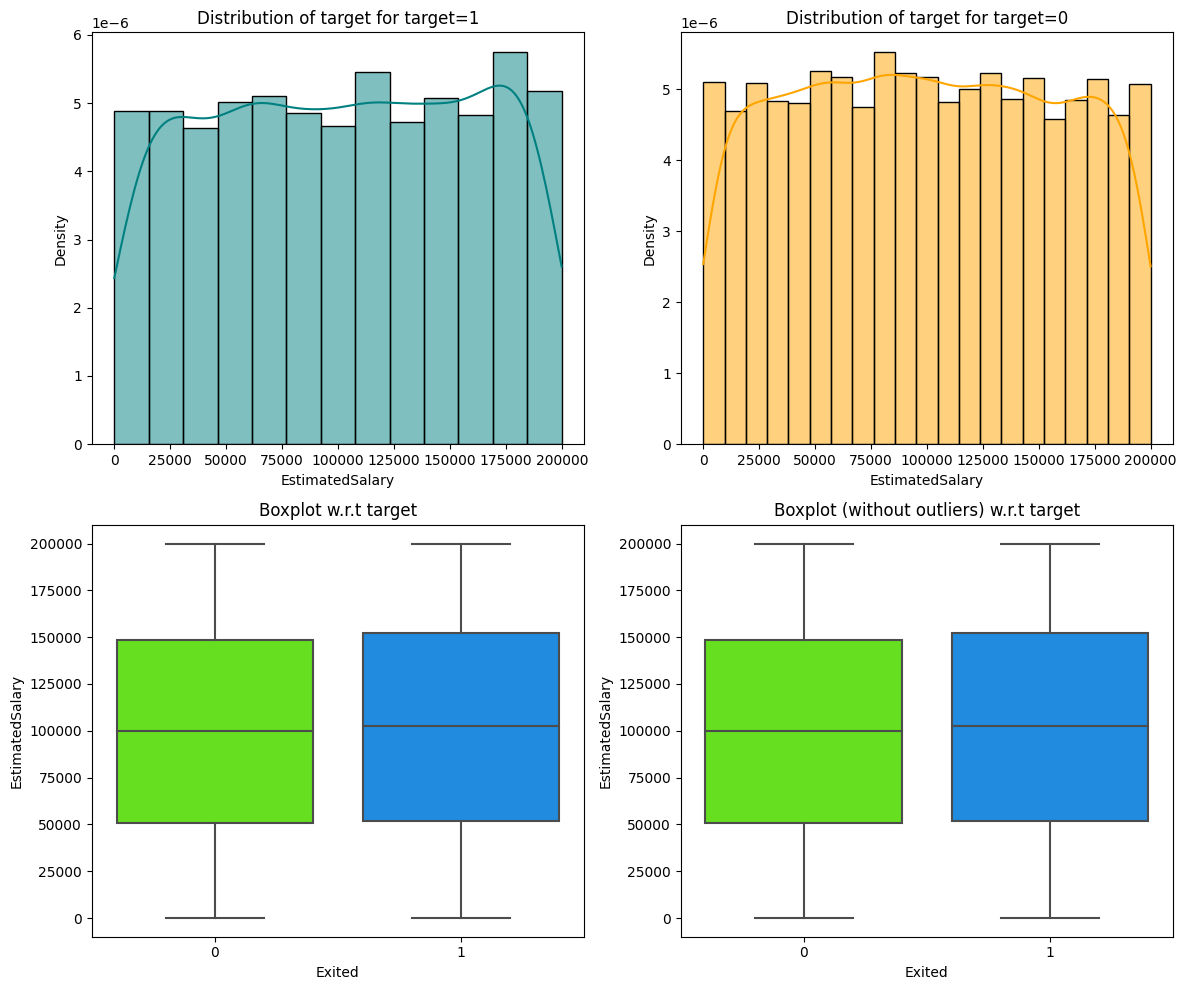

In [ ]:
distribution_plot_wrt_target(ds,"EstimatedSalary" , "Exited")

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

In [ ]:
Q1 = ds.quantile(0.25)  # To find the 25th percentile and 75th percentile.
Q3 = ds.quantile(0.75)

IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)

lower = (Q1 - 1.5 * IQR)  # Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper = Q3 + 1.5 * IQR

In [ ]:
(
    (ds.select_dtypes(include=["float64", "int64"]) < lower)
    | (ds.select_dtypes(include=["float64", "int64"]) > upper)
).sum() / len(ds) * 100

RowNumber           0.00
CustomerId          0.00
CreditScore         0.15
Age                 3.59
Tenure              0.00
Balance             0.00
NumOfProducts       0.60
HasCrCard           0.00
IsActiveMember      0.00
EstimatedSalary     0.00
Exited             20.37
dtype: float64

Observations:
- CreditScore (0.15%) and age (3.59%) have outliers .

In [ ]:
data=ds.copy()

- Transforming IsActiveMember and HasCrCard in a categorical columns.

In [ ]:
data[["HasCrCard", "IsActiveMember"]] = data[["HasCrCard", "IsActiveMember"]].astype("category")


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   RowNumber        10000 non-null  int64   
 1   CustomerId       10000 non-null  int64   
 2   Surname          10000 non-null  object  
 3   CreditScore      10000 non-null  int64   
 4   Geography        10000 non-null  object  
 5   Gender           10000 non-null  object  
 6   Age              10000 non-null  int64   
 7   Tenure           10000 non-null  int64   
 8   Balance          10000 non-null  float64 
 9   NumOfProducts    10000 non-null  int64   
 10  HasCrCard        10000 non-null  category
 11  IsActiveMember   10000 non-null  category
 12  EstimatedSalary  10000 non-null  float64 
 13  Exited           10000 non-null  int64   
dtypes: category(2), float64(2), int64(7), object(3)
memory usage: 957.4+ KB


Creating Dummy columns for Gender and Geography

In [ ]:
data_Dummy=pd.get_dummies(data, columns=["Gender","Geography"],drop_first=True)

In [ ]:
data_Dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   RowNumber          10000 non-null  int64   
 1   CustomerId         10000 non-null  int64   
 2   Surname            10000 non-null  object  
 3   CreditScore        10000 non-null  int64   
 4   Age                10000 non-null  int64   
 5   Tenure             10000 non-null  int64   
 6   Balance            10000 non-null  float64 
 7   NumOfProducts      10000 non-null  int64   
 8   HasCrCard          10000 non-null  category
 9   IsActiveMember     10000 non-null  category
 10  EstimatedSalary    10000 non-null  float64 
 11  Exited             10000 non-null  int64   
 12  Gender_Male        10000 non-null  uint8   
 13  Geography_Germany  10000 non-null  uint8   
 14  Geography_Spain    10000 non-null  uint8   
dtypes: category(2), float64(2), int64(7), object(1), uint8

Removing The columns RowNumber, CustomerID and Surname, because they are sequential (RowNumber and CustomerID) and unique (Surname) values and will not help into the model.

In [ ]:
data_Dummy.drop(["RowNumber","CustomerId","Surname"], axis=1, inplace=True)

Creating the X (features) and y (target) variables

In [ ]:
X = data_Dummy.drop(['Exited'],axis=1)
y = data_Dummy[['Exited']]


In [ ]:
X.head(10)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Male,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1
5,645,44,8,113755.78,2,1,0,149756.71,1,0,1
6,822,50,7,0.00,2,1,1,10062.80,1,0,0
7,376,29,4,115046.74,4,1,0,119346.88,0,1,0
8,501,44,4,142051.07,2,0,1,74940.50,1,0,0
9,684,27,2,134603.88,1,1,1,71725.73,1,0,0


- Splitting the data into Train, Validation and Test

In [ ]:
X_large, X_test, y_large, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42,stratify=y,shuffle = True)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_large,y_large, test_size = 0.2, random_state = 42,stratify=y_large, shuffle = True)

Standardizing the numerical values to same scale.

In [ ]:
sc=StandardScaler()
temp = sc.fit(X_train[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]])
X_train[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]] = temp.transform(X_train[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]])
X_test[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]] = temp.transform(X_test[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]])
X_val[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]] = temp.transform(X_val[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]])

## Model Building

### Model Evaluation Criterion

**Model can make wrong predictions as:**
* Predicting a customer is exiting  and the customer  is not exiting
* Predicting a customer is not exiting and  customer is  exiting

**Which case is more important?**
* Predicting that customer is not exiting but he/she is exiting. It might cause loss to the banks because due to wrong identification bank will not be able to take any initiative for those sensitive customers.

**How to reduce this loss i.e need to reduce False Negative?**
* Bank would want `Recall` to be maximized, greater the Recall higher the chances of minimizing false Negative. Hence, the focus should be on increasing Recall or minimizing the false Negative or in other words identifying the True Positive(i.e. Class 1) so that the bank can retain their customers.

In [ ]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)

    if title:
        plt.title(title)

In [ ]:
def draw_confusion_matrix(model,X_test_temp,y_test_temp,threshold):
  y_pred1 = model.predict(X_test_temp)
  for i in range(len(y_test_temp)):
      if y_pred1[i]>threshold:
          y_pred1[i]=1
      else:
          y_pred1[i]=0



  cm2=confusion_matrix(y_test_temp, y_pred1)
  labels = ['True Negative','False Positive','False Negative','True Positive']
  categories = [ 'Not_Exited','Exited']
  make_confusion_matrix(cm2,
                        group_names=labels,
                        categories=categories,
                        cmap='Blues')

In [ ]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators
np.random.seed(42)

import random
random.seed(42)

tf.random.set_seed(42)

Initializing the Neural Network with 1 input layer, 1 hidden layer and 1 output layer (sigmoid)

In [ ]:
# Initializing the ANN
classifier = Sequential()
classifier.add(Dense(activation = 'relu', input_dim = 11, units=64))

classifier.add(Dense(32, activation='relu'))

classifier.add(Dense(1, activation = 'sigmoid'))


Using SGD optimizer with Momentum.

In [ ]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.metrics import Recall

optimizer = SGD(learning_rate=0.01)
classifier.compile(optimizer=optimizer, loss='binary_crossentropy',metrics=["accuracy"]) #metrics=[Recall()])


In [ ]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Fitting the model

In [ ]:
history=classifier.fit(X_train,y_train,batch_size=32,epochs=50,validation_data=(X_val,y_val))

Epoch 1/50
200/200 [==============================] - 2s 8ms/step - loss: 0.5172 - accuracy: 0.7878 - val_loss: 0.4807 - val_accuracy: 0.7962
Epoch 2/50
200/200 [==============================] - 1s 3ms/step - loss: 0.4721 - accuracy: 0.7962 - val_loss: 0.4572 - val_accuracy: 0.7969
Epoch 3/50
200/200 [==============================] - 1s 3ms/step - loss: 0.4537 - accuracy: 0.7953 - val_loss: 0.4435 - val_accuracy: 0.8006
Epoch 4/50
200/200 [==============================] - 1s 3ms/step - loss: 0.4420 - accuracy: 0.7969 - val_loss: 0.4355 - val_accuracy: 0.8112
Epoch 5/50
200/200 [==============================] - 1s 3ms/step - loss: 0.4343 - accuracy: 0.8017 - val_loss: 0.4303 - val_accuracy: 0.8119
Epoch 6/50
200/200 [==============================] - 1s 3ms/step - loss: 0.4289 - accuracy: 0.8075 - val_loss: 0.4270 - val_accuracy: 0.8163
Epoch 7/50
200/200 [==============================] - 1s 3ms/step - loss: 0.4250 - accuracy: 0.8114 - val_loss: 0.4246 - val_accuracy: 0.8188
Epoch 

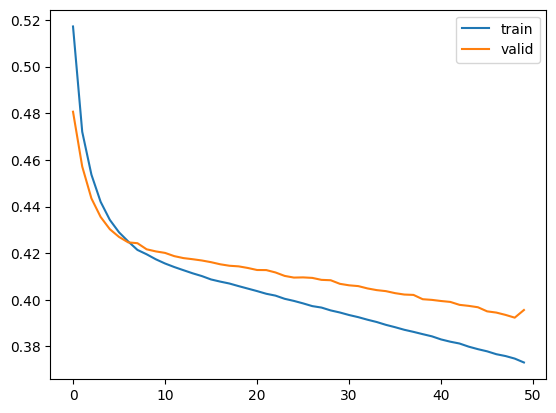

In [ ]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

the model is overfitting since there is a gap between train and validation data.

In [ ]:
score = classifier.evaluate(X_test, y_test)
print(score)

63/63 [==============================] - 0s 2ms/step - loss: 0.3831 - accuracy: 0.8345
[0.38306546211242676, 0.8345000147819519]


In [ ]:
#print(score)

63/63 [==============================] - 0s 2ms/step


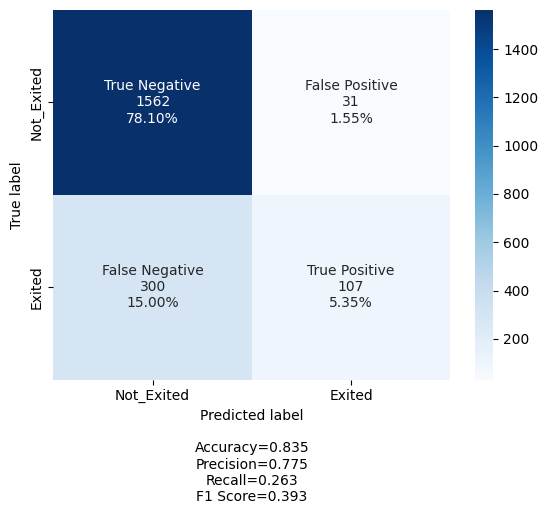

In [ ]:
draw_confusion_matrix(classifier,X_test,y_test,0.5)

The model is overfitting and also the recall is very bad only 26%. Let`s try to improve the model.

### Model Building: Neural Network model with Adam Optimizer

In [ ]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators
np.random.seed(42)

import random
random.seed(42)

tf.random.set_seed(42)

Same layers as previous model.

In [ ]:
# Initializing the ANN
classifier2 = Sequential()
classifier2.add(Dense(activation = 'relu', input_dim = 11, units=64))

classifier2.add(Dense(32, activation='relu'))

classifier2.add(Dense(1, activation = 'sigmoid'))

Using Adam optimizer

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Recall

optimizer2 = Adam(learning_rate=0.001)
classifier2.compile(optimizer=optimizer2, loss='binary_crossentropy',metrics=["accuracy"]) #metrics=[Recall()])

In [ ]:
classifier2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history2=classifier2.fit(X_train,y_train,batch_size=32,epochs=50,validation_data=(X_val,y_val))

Epoch 1/50
200/200 [==============================] - 2s 4ms/step - loss: 0.4558 - accuracy: 0.8014 - val_loss: 0.4269 - val_accuracy: 0.8119
Epoch 2/50
200/200 [==============================] - 1s 3ms/step - loss: 0.4166 - accuracy: 0.8214 - val_loss: 0.4179 - val_accuracy: 0.8213
Epoch 3/50
200/200 [==============================] - 1s 3ms/step - loss: 0.4054 - accuracy: 0.8286 - val_loss: 0.4089 - val_accuracy: 0.8325
Epoch 4/50
200/200 [==============================] - 1s 3ms/step - loss: 0.3937 - accuracy: 0.8347 - val_loss: 0.3996 - val_accuracy: 0.8369
Epoch 5/50
200/200 [==============================] - 1s 3ms/step - loss: 0.3840 - accuracy: 0.8377 - val_loss: 0.3976 - val_accuracy: 0.8381
Epoch 6/50
200/200 [==============================] - 1s 3ms/step - loss: 0.3755 - accuracy: 0.8444 - val_loss: 0.3905 - val_accuracy: 0.8425
Epoch 7/50
200/200 [==============================] - 1s 3ms/step - loss: 0.3691 - accuracy: 0.8464 - val_loss: 0.3847 - val_accuracy: 0.8419
Epoch 

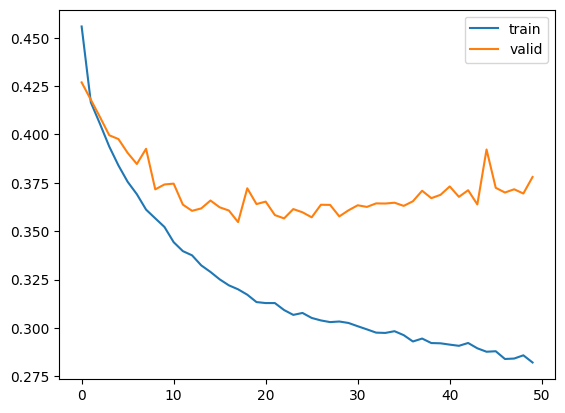

In [ ]:
# Capturing learning history per epoch
history=[]
hist2  = pd.DataFrame(history2.history)
hist2['epoch'] = history2.epoch

# Plotting accuracy at different epochs
plt.plot(hist2['loss'])
plt.plot(hist2['val_loss'])
plt.legend(("train" , "valid") , loc =0)

The model is overfitting (worst than previous).

In [ ]:
score = classifier2.evaluate(X_test, y_test)
print(score)

63/63 [==============================] - 0s 2ms/step - loss: 0.3681 - accuracy: 0.8540
[0.36806318163871765, 0.8539999723434448]


63/63 [==============================] - 0s 1ms/step


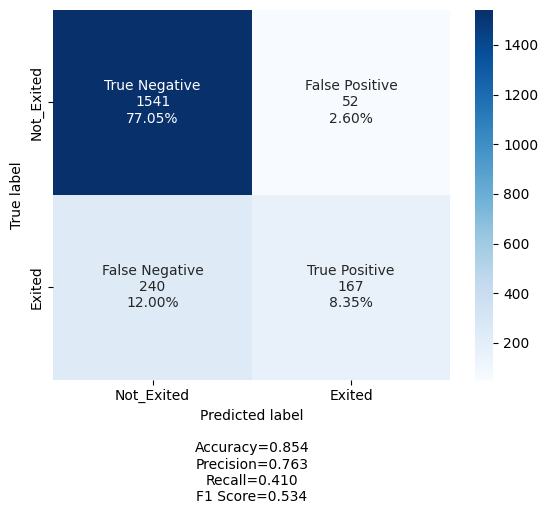

In [ ]:
draw_confusion_matrix(classifier2,X_test,y_test,0.5)

**The model still overfitting. The recall still very bad.**<br>
Let´s add dropouts to deal with the overfitting.  

### Model Improvement: Neural Network model with Dropout

In [ ]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators
np.random.seed(42)

import random
random.seed(42)

tf.random.set_seed(42)

Model with dropout.
- 1 Input Layer (11 input features).
- Dropout 20%
- Hidden layer with 16 units.
- Dropout 20%
- Hidden layer 8 units.
- Output layer (Sigmoid - Binary Classification)

In [ ]:
# Initializing the ANN
classifier3 = Sequential()
classifier3.add(Dense(activation = 'relu', input_dim = 11, units=32))
classifier3.add(Dropout(0.2))
classifier3.add(Dense(16, activation='relu'))
classifier3.add(Dropout(0.2))
classifier3.add(Dense(8, activation='relu'))
classifier3.add(Dense(1, activation = 'sigmoid'))


In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Recall

optimizer3 = Adam(learning_rate=0.001)
classifier3.compile(optimizer=optimizer3, loss='binary_crossentropy',metrics=["accuracy"]) #metrics=[Recall()])

In [ ]:
classifier3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1057 (4.13 KB)
Trainable params: 1057 (4.1

In [ ]:
history3=classifier3.fit(X_train,y_train,batch_size=32,epochs=50,validation_data=(X_val,y_val))

Epoch 1/50
200/200 [==============================] - 2s 4ms/step - loss: 0.6863 - accuracy: 0.6386 - val_loss: 0.6140 - val_accuracy: 0.7962
Epoch 2/50
200/200 [==============================] - 1s 3ms/step - loss: 0.5113 - accuracy: 0.7962 - val_loss: 0.4495 - val_accuracy: 0.7962
Epoch 3/50
200/200 [==============================] - 1s 4ms/step - loss: 0.4482 - accuracy: 0.7966 - val_loss: 0.4350 - val_accuracy: 0.7950
Epoch 4/50
200/200 [==============================] - 1s 4ms/step - loss: 0.4400 - accuracy: 0.8022 - val_loss: 0.4314 - val_accuracy: 0.8094
Epoch 5/50
200/200 [==============================] - 1s 4ms/step - loss: 0.4323 - accuracy: 0.8059 - val_loss: 0.4252 - val_accuracy: 0.8119
Epoch 6/50
200/200 [==============================] - 1s 4ms/step - loss: 0.4289 - accuracy: 0.8111 - val_loss: 0.4214 - val_accuracy: 0.8175
Epoch 7/50
200/200 [==============================] - 1s 3ms/step - loss: 0.4219 - accuracy: 0.8158 - val_loss: 0.4156 - val_accuracy: 0.8250
Epoch 

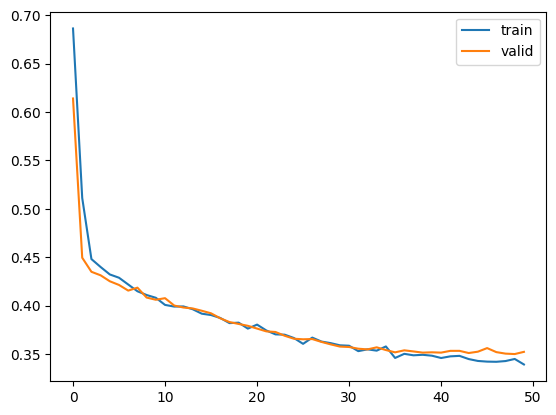

In [ ]:
# Capturing learning history per epoch
history2=[]
hist3  = pd.DataFrame(history3.history)
hist3['epoch'] = history3.epoch

# Plotting accuracy at different epochs
plt.plot(hist3['loss'])
plt.plot(hist3['val_loss'])
plt.legend(("train" , "valid") , loc =0)

The model with Adam optimizer and dropouts is more generalized.   

The sigmoid returns a percentage, so it is important to adjust the threshold (the deafult is 50%)

200/200 [==============================] - 0s 1ms/step
Best Threshold=0.179516, G-Mean=0.798


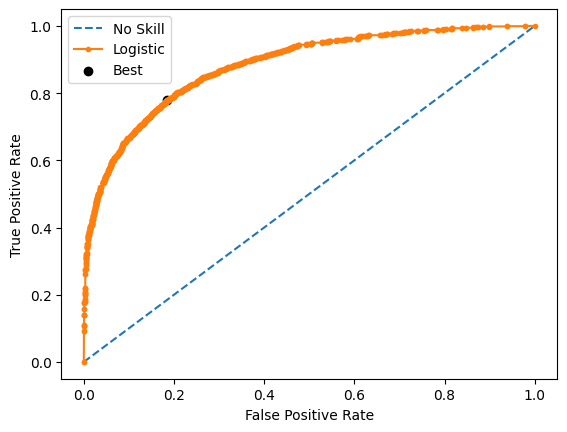

In [ ]:
# predict probabilities
yhat = classifier3.predict(X_train)
# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

The Best Threshold is **18%**

63/63 [==============================] - 0s 1ms/step


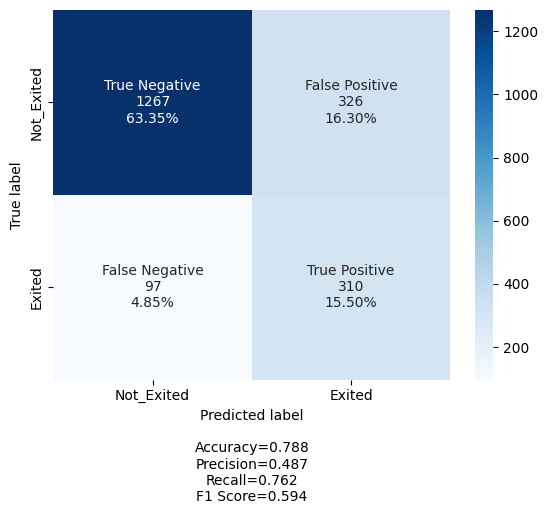

In [ ]:
draw_confusion_matrix(classifier3,X_test,y_test,0.18)

We got a generalized model with a recall of 76%, not bad.  Let's see if it is possible to improve the model with early stopping.

### Model Improvement: Neural Network model with Early Stopping

In [ ]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators
np.random.seed(42)

import random
random.seed(42)

tf.random.set_seed(42)

In [ ]:
# Initializing the ANN
classifier4 = Sequential()
classifier4.add(Dense(activation = 'relu', input_dim = 11, units=32))
classifier4.add(Dropout(0.2))
classifier4.add(Dense(16, activation='relu'))
classifier4.add(Dropout(0.2))
classifier4.add(Dense(8, activation='relu'))
classifier4.add(Dense(1, activation = 'sigmoid'))

In [ ]:
classifier4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1057 (4.13 KB)
Trainable params: 1057 (4.1

Adding a callback. The model will stop when the delta loss is less than 0.001 after 3 times.  

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Recall

optimizer4 = Adam(learning_rate=0.001)
classifier4.compile(optimizer=optimizer4, loss='binary_crossentropy',metrics=["accuracy"]) #metrics=[Recall()])

es_cb = callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=3)

In [ ]:
history4=classifier4.fit(X_train,y_train,batch_size=32,epochs=50,validation_data=(X_val,y_val),callbacks=es_cb)

Epoch 1/50
200/200 [==============================] - 2s 4ms/step - loss: 0.6863 - accuracy: 0.6386 - val_loss: 0.6140 - val_accuracy: 0.7962
Epoch 2/50
200/200 [==============================] - 1s 4ms/step - loss: 0.5113 - accuracy: 0.7962 - val_loss: 0.4495 - val_accuracy: 0.7962
Epoch 3/50
200/200 [==============================] - 1s 4ms/step - loss: 0.4482 - accuracy: 0.7966 - val_loss: 0.4350 - val_accuracy: 0.7950
Epoch 4/50
200/200 [==============================] - 1s 4ms/step - loss: 0.4400 - accuracy: 0.8022 - val_loss: 0.4314 - val_accuracy: 0.8094
Epoch 5/50
200/200 [==============================] - 1s 4ms/step - loss: 0.4323 - accuracy: 0.8059 - val_loss: 0.4252 - val_accuracy: 0.8119
Epoch 6/50
200/200 [==============================] - 1s 4ms/step - loss: 0.4289 - accuracy: 0.8111 - val_loss: 0.4214 - val_accuracy: 0.8175
Epoch 7/50
200/200 [==============================] - 1s 4ms/step - loss: 0.4219 - accuracy: 0.8158 - val_loss: 0.4156 - val_accuracy: 0.8250
Epoch 

The model stopped after 39 epochs.

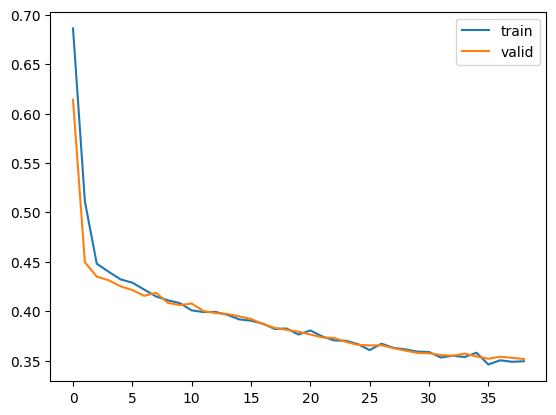

In [ ]:
# Capturing learning history per epoch
history3=[]
hist4  = pd.DataFrame(history4.history)
hist4['epoch'] = history4.epoch

# Plotting accuracy at different epochs
plt.plot(hist4['loss'])
plt.plot(hist4['val_loss'])
plt.legend(("train" , "valid") , loc =0)

The model is generalized and got a improvement with the early stopping.

200/200 [==============================] - 0s 1ms/step
Best Threshold=0.173383, G-Mean=0.794


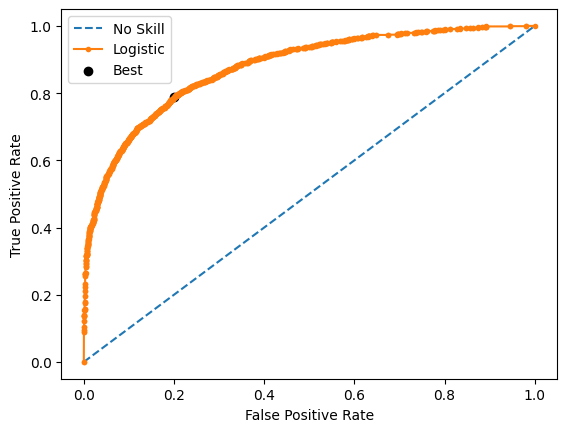

In [ ]:
# predict probabilities
yhat = classifier4.predict(X_train)
# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

the best Threshold for this model us 17%.

63/63 [==============================] - 0s 2ms/step


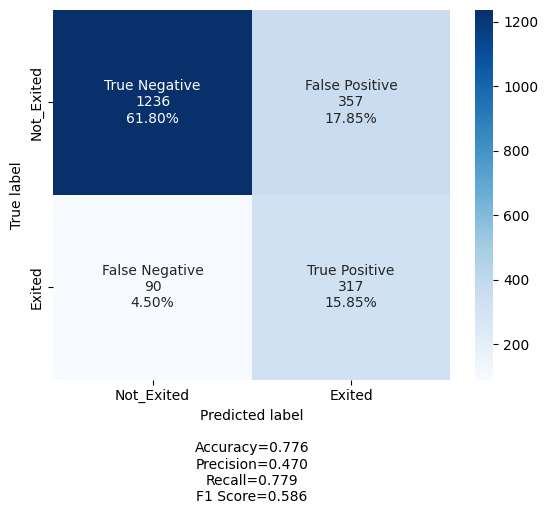

In [ ]:
draw_confusion_matrix(classifier4,X_test,y_test,0.17)

The model got a recall of 78% (better than previous),  the precision is not good (only 47%)

### Model Improvement: Neural Network model with Hyperparameter tuning

In [ ]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators
np.random.seed(42)

import random
random.seed(42)

tf.random.set_seed(42)

In [ ]:
# Initializing the ANN
def create_model_gscv2():
    model = Sequential()
    model.add(Dense(activation = 'relu', input_dim = 11, units=32))
    model.add(Dropout(0.2))
    model.add(Dense(16, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation = 'sigmoid'))

    opt = tf.keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=opt, loss='binary_crossentropy',metrics=["accuracy"]) #metrics=[Recall()])

    return model

Using RandomizedSearchCV to identify the best values for batchsize

In [ ]:
#from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

keras_estimator = KerasClassifier(build_fn=create_model_gscv2, verbose=1)
parameters = {'batch_size': [8,16,32, 64]}

grid_search = RandomizedSearchCV(estimator=keras_estimator, param_distributions=parameters, cv=5,n_jobs=-1,random_state=17)
#grid_search = GridSearchCV(estimator=keras_estimator, param_grid=parameters, cv=5,n_jobs=-1,verbose=1)

import time
begin = time.time()
es_cb_temp = callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=3)
grid_result=grid_search.fit(X_train, y_train,validation_data= (X_val,y_val),callbacks=[es_cb_temp])

end = time.time()
# total time taken
print(f"Total runtime of the program is {end - begin}")
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

800/800 [==============================] - 4s 4ms/step - loss: 0.5420 - accuracy: 0.7498 - val_loss: 0.4384 - val_accuracy: 0.7944
Total runtime of the program is 18.135066986083984
Best: 0.801250 using {'batch_size': 8}


In [ ]:
classifier6=create_model_gscv2()
es_cb = callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=3)
history6=classifier6.fit(X_train,y_train,batch_size=8,epochs=50,validation_data=(X_val,y_val),callbacks=[es_cb])

Epoch 1/50
800/800 [==============================] - 4s 4ms/step - loss: 0.4748 - accuracy: 0.7852 - val_loss: 0.4314 - val_accuracy: 0.8050
Epoch 2/50
800/800 [==============================] - 3s 3ms/step - loss: 0.4342 - accuracy: 0.8102 - val_loss: 0.4241 - val_accuracy: 0.8100
Epoch 3/50
800/800 [==============================] - 3s 3ms/step - loss: 0.4233 - accuracy: 0.8209 - val_loss: 0.4095 - val_accuracy: 0.8294
Epoch 4/50
800/800 [==============================] - 3s 3ms/step - loss: 0.4142 - accuracy: 0.8258 - val_loss: 0.4037 - val_accuracy: 0.8381
Epoch 5/50
800/800 [==============================] - 3s 3ms/step - loss: 0.4036 - accuracy: 0.8341 - val_loss: 0.3991 - val_accuracy: 0.8381
Epoch 6/50
800/800 [==============================] - 3s 3ms/step - loss: 0.3997 - accuracy: 0.8388 - val_loss: 0.3927 - val_accuracy: 0.8444
Epoch 7/50
800/800 [==============================] - 3s 3ms/step - loss: 0.3915 - accuracy: 0.8413 - val_loss: 0.3818 - val_accuracy: 0.8481
Epoch 

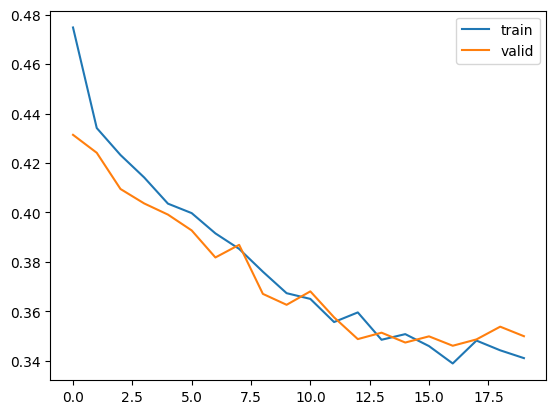

In [ ]:
# Capturing learning history per epoch
hist6  = pd.DataFrame(history6.history)
hist6['epoch'] = history6.epoch

# Plotting accuracy at different epochs
plt.plot(hist6['loss'])
plt.plot(hist6['val_loss'])
plt.legend(("train" , "valid") , loc =0)

The model is good and generalized.

200/200 [==============================] - 0s 1ms/step
Best Threshold=0.192260, G-Mean=0.797


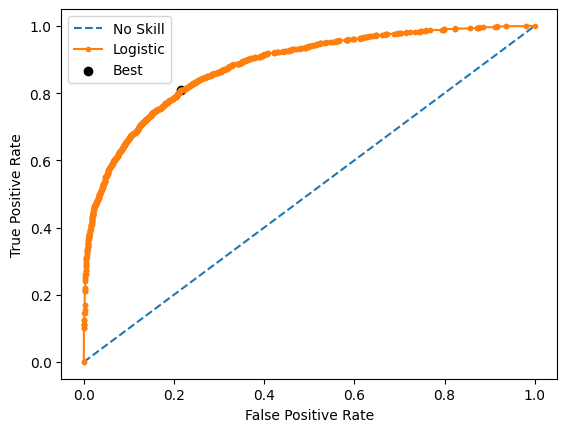

In [ ]:
# predict probabilities
yhat = classifier6.predict(X_train)
# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

63/63 [==============================] - 0s 1ms/step


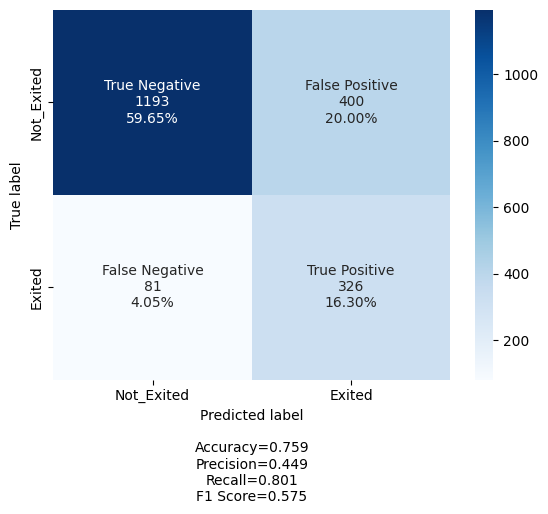

In [ ]:
draw_confusion_matrix(classifier6,X_test,y_test,0.19)

The model with hyper-parameter adjusted (using RandomizedSearchCV) got a good performance and a better recall (80%). The negative side is that the precision is bad (only 44%).

### Model Improvement: Neural Network model with balanced data

Since the dataset is unbalaced (only 20% of churn. Let~s try to balance the dataset.

In [ ]:
from imblearn.over_sampling import ADASYN

print("Before Oversampling, the shape of train_X: {}".format(X_train.shape))
print("Before Oversampling, the shape of train_y: {} \n".format(y_train.shape))
print("Before Oversampling, proportion of label 'Yes':",y_train.sum()/y_train.count())

sm = ADASYN(random_state=42)  # Adaptative SMOTE - Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After Oversampling, proportion of label 'Yes':",y_train_over.sum()/y_train_over.count())


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, the shape of train_X: (6400, 11)
Before Oversampling, the shape of train_y: (6400, 1) 

Before Oversampling, proportion of label 'Yes': Exited    0.20375
dtype: float64
After Oversampling, proportion of label 'Yes': Exited    0.506106
dtype: float64
After Oversampling, the shape of train_X: (10318, 11)
After Oversampling, the shape of train_y: (10318, 1) 



In [ ]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators
np.random.seed(42)

import random
random.seed(42)

tf.random.set_seed(42)

In [ ]:
# Initializing the ANN
classifier7 = Sequential()
classifier7.add(Dense(activation = 'relu', input_dim = 11, units=16))
classifier7.add(Dropout(0.2))
classifier7.add(Dense(8, activation='relu'))
classifier7.add(Dropout(0.2))
classifier7.add(Dense(4, activation='relu'))
classifier7.add(Dense(1, activation = 'sigmoid'))

optimizer7 = Adam(learning_rate=0.001)
classifier7.compile(optimizer=optimizer7, loss='binary_crossentropy',metrics=["accuracy"]) #metrics=[Recall()])
es_cb = callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5)


In [ ]:
classifier7.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                192       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_2 (Dense)             (None, 4)                 36        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 369 (1.44 KB)
Trainable params: 369 (1.44 

In [ ]:
history7=classifier7.fit(X_train_over,y_train_over,batch_size=64,epochs=100,validation_data=(X_val,y_val),callbacks=[es_cb])

Epoch 1/100
162/162 [==============================] - 2s 4ms/step - loss: nan - accuracy: 0.4945 - val_loss: nan - val_accuracy: 0.7962
Epoch 2/100
162/162 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.4939 - val_loss: nan - val_accuracy: 0.7962
Epoch 3/100
162/162 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.4939 - val_loss: nan - val_accuracy: 0.7962
Epoch 4/100
162/162 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.4939 - val_loss: nan - val_accuracy: 0.7962
Epoch 5/100
162/162 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.4939 - val_loss: nan - val_accuracy: 0.7962


The model is overfitting (the loss is near 0).

## Final Model

The best model was **Adam + dropout + earlystopping and hyper parameters adjusted**

200/200 [==============================] - 0s 1ms/step
Best Threshold=0.192260, G-Mean=0.797


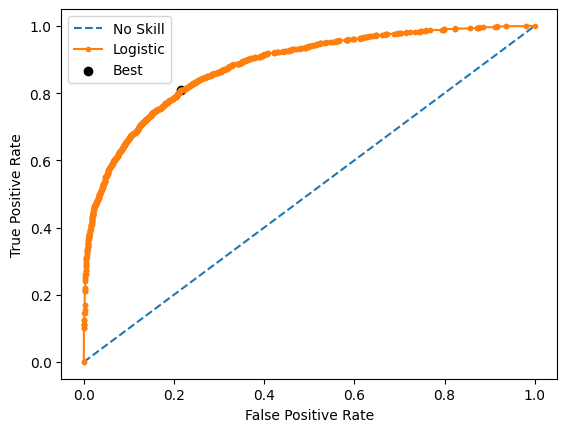

In [ ]:
# predict probabilities using the best model
yhat = classifier6.predict(X_train)
# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [ ]:
# Complete the code to Predict the X_test data using the best model
y_pred_test = classifier6.predict(X_test)
y_pred_test = (y_pred_test > thresholds[ix])
print(y_pred_test)

63/63 [==============================] - 0s 1ms/step
[[False]
 [False]
 [False]
 ...
 [ True]
 [False]
 [False]]


63/63 [==============================] - 0s 1ms/step


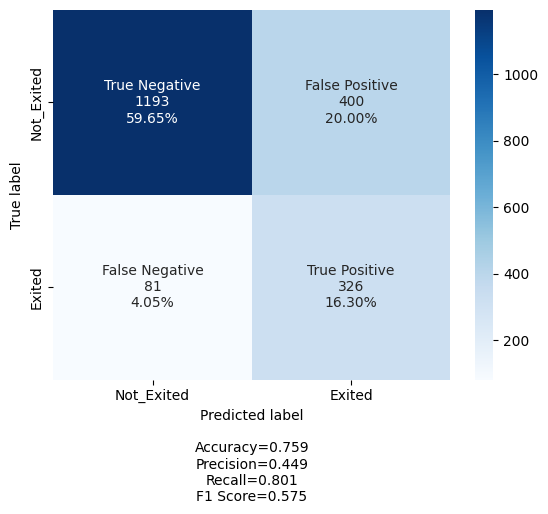

In [ ]:
draw_confusion_matrix(classifier6,X_test,y_test,0.19)

**Recall:78%**

## Actionable Insights and Recommendations

**What recommedations would you suggest to the bank?**

- We have been able to build a Neural Network model that the bank can deploy to identify the customers at churn risk and take preventive actions.
-The model has a recall of **80%**. <br><br>
 **Insights and Recommendations:** <br>
- **Geography**:The proportion of churn in Germany (~32%) is bigger than in the other contries, so the bank should take specific actions in that country.
- **Active Members**:The churn between non active members(27%) is greater than between the active customers (14%), so the bank should create some campaigns to keep the customers actives.
- **Gender**: The churn between female is bigger than males. The bank must create some campaign to change it.
- **Age**: Although correlation does not imply causality, there is a small correlation between churn and age. So, the bank might  attract more yong customers.
  

___